# Quantum Prisoner's Dilemma #

In [36]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tabulate import tabulate

Initializing states

In [64]:
C = np.array([1,0])
D = np.array([0,1])

CC = np.kron(C,C)
DD = np.kron(D,D)

In [65]:
# To find conjugate transpose
def H(j):
    return j.conjugate().T

### Initializing operator $\hat{J}$

In [66]:
def J(g):
    j = np.zeros((4,4), dtype = complex)
    for i in range(4):
        j[i][i] = cos(g/2)
    j[0][3] = -1j*sin(g/2)
    j[1][2] = 1j*sin(g/2)
    j[2][1] = 1j*sin(g/2)
    j[3][0] = -1j*sin(g/2)
    return j

### Strategy Operator $\hat{U}(\theta, \Phi)$

In [67]:
def U(theta, phi):
    u = np.array([[np.exp(1j*phi)*cos(theta/2), sin(theta/2)], 
                  [-sin(theta/2), np.exp(-1j*phi)*cos(theta/2)]])
    return u

### final state $\mid\psi_f\rangle$

In [68]:
def Psi(J, Ua, Ub):
    psi = np.matmul(np.matmul(H(J), np.kron(Ua,Ub)),np.matmul(J, CC))
    return psi

### Expected payoff ($)

In [106]:
def expected_payoff(p, psi):
    a, b= 0, 0
    for i in range(len(p[0])):
        a += p[0][i]*(abs(psi[i]))**2
        b += p[1][i]*(abs(psi[i]))**2
    return a, b

In [111]:
# For plotting

def payoff_plot(gamma, p, x, y):
    
    j = J(gamma)
    Ua = U(x*pi,0) if x >= 0 else U(0,-x*pi/2)
    Ub = U(y*pi,0) if y >= 0 else U(0,-y*pi/2)
    psi = Psi(j,Ua,Ub)
    a, b = expected_payoff(p, psi)
    return a

### Payoff matrix

In [118]:
payoff = np.array([[3, 0, 5, 1],[3, 5, 0, 1]])


## Alice's payoff in a separable game ($\gamma$ = 0)

In [119]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(0, payoff, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


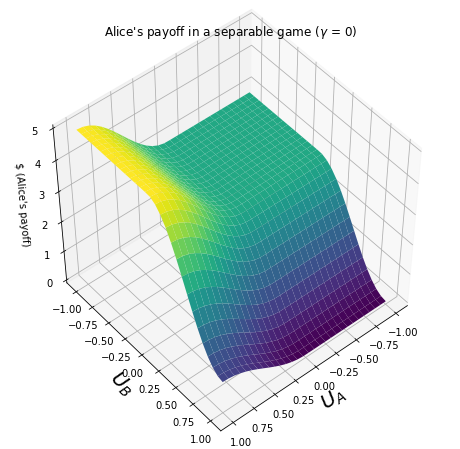

In [120]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a separable game ($\gamma$ = 0)")
ax.view_init(50, 50)

## Alice's payoff in a maximally entangled ($\gamma = \frac{\pi}{2}$)

In [128]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(pi/2, payoff, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


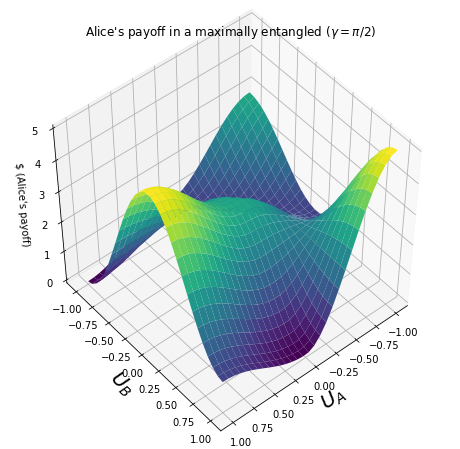

In [129]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a maximally entangled ($\gamma = \pi/2$)")
ax.view_init(50, 50)

## RANDOM MIXED STRATEGIES IN QPD


In [165]:
def QPD_mixed_payoff(p, q):
    s = (4 - 2*p*q + p + q)/2
    return s

In [178]:

p = np.linspace(0, 1, 30)
q = np.linspace(0, 1, 30)

v = np.vectorize(QPD_mixed_payoff)
X, Y = np.meshgrid(p, q)
Z = v(X, Y)


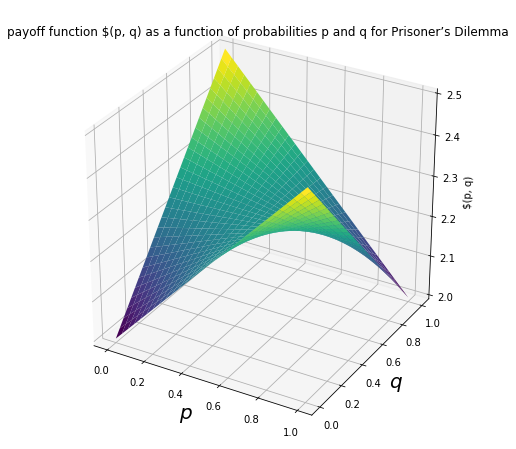

In [179]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$p$", fontsize=20)
ax.set_ylabel("$q$", fontsize=20)
ax.set_zlabel("$(p, q)")
ax.set_title("payoff function $(p, q) as a function of probabilities p and q for Prisoner’s Dilemma")

plt.show()

### Payoff Table

In [170]:
def payoff_table(p, m):
    def ab(A, B):
        psi = Psi(J(pi/2),A,B)
        al, bo = expected_payoff(p, psi)
        return round(al,1), round(bo,1)
    C = U(0,0)
    D = U(pi,0)
    Q = U(0,pi/2)
    
    mp = (m(1,0), m(0,1))

    table = [["",'','C','D', 'Q', 'R'],['',"C",str(ab(C, C)),str(ab(C, D)), str(ab(C, Q)), mp],
             ['Alice',"D",str(ab(D, C)),str(ab(D, D)), str(ab(D, Q)),mp],['',"Q",str(ab(Q, C)),str(ab(Q, D)), str(ab(Q, Q)), mp],
            ['','R',mp, mp, mp, mp]]
    headers = ["Bob",'']
    print(tabulate(table, headers, tablefmt="pretty"))
    
payoff_table(payoff, QPD_mixed_payoff)

+-------+---+------------+------------+------------+------------+
|       |   |            |            |    Bob     |            |
+-------+---+------------+------------+------------+------------+
|       |   |     C      |     D      |     Q      |     R      |
|       | C | (3.0, 3.0) | (0.0, 5.0) | (1.0, 1.0) | (2.5, 2.5) |
| Alice | D | (5.0, 0.0) | (1.0, 1.0) | (0.0, 5.0) | (2.5, 2.5) |
|       | Q | (1.0, 1.0) | (5.0, 0.0) | (3.0, 3.0) | (2.5, 2.5) |
|       | R | (2.5, 2.5) | (2.5, 2.5) | (2.5, 2.5) | (2.5, 2.5) |
+-------+---+------------+------------+------------+------------+


# QUANTUM HAWK-DOVE GAME


### payoff matrix

In [173]:
def HD_payoff_matrix(v, i, d):
    return np.array([[(v - i)/2, v, 0, v/2 -d],[(v - i)/2, 0, v, v/2 -d]])

In [175]:
HD = HD_payoff_matrix(50, 100, 10)
HD

array([[-25.,  50.,   0.,  15.],
       [-25.,   0.,  50.,  15.]])

In [177]:
def QHD_mixed_payoff(p, q):
    s = -60*p*q + 30*(p + q) - 5
    return s

In [193]:
p = np.linspace(0, 1, 30)
q = np.linspace(0, 1, 30)

v = np.vectorize(QHD_mixed_payoff)
X, Y = np.meshgrid(p, q)
Z = v(X, Y)

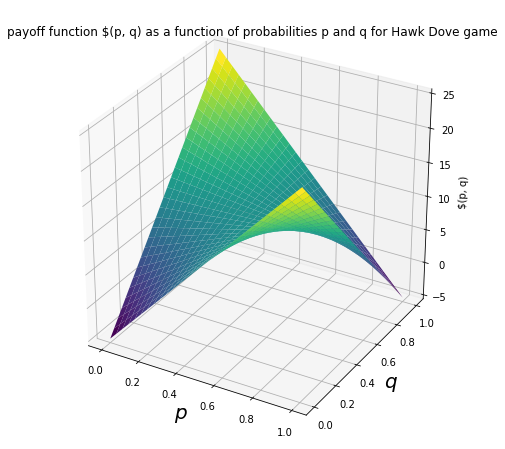

In [194]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$p$", fontsize=20)
ax.set_ylabel("$q$", fontsize=20)
ax.set_zlabel("$(p, q)")
ax.set_title("payoff function $(p, q) as a function of probabilities p and q for Hawk Dove game")

plt.show()

In [188]:
p = np.linspace(0, 1, 300)
q = np.linspace(0, 1, 300)
xp, yq = [], []
for i in p:
    for j in q:
        if QHD_mixed_payoff(i,j)>15:
            xp.append(i)
            yq.append(j)

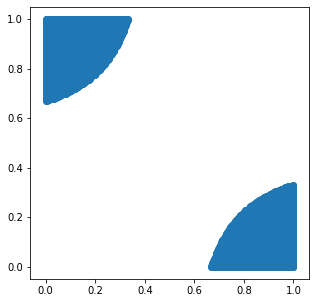

In [190]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.scatter(xp, yq)
plt.show()

### Payoff Table

In [183]:
payoff_table(HD, QHD_mixed_payoff)

+-------+---+----------------+--------------+----------------+----------+
|       |   |                |              |      Bob       |          |
+-------+---+----------------+--------------+----------------+----------+
|       |   |       C        |      D       |       Q        |    R     |
|       | C | (-25.0, -25.0) | (50.0, -0.0) |  (15.0, 15.0)  | (25, 25) |
| Alice | D |  (-0.0, 50.0)  | (15.0, 15.0) |  (50.0, 0.0)   | (25, 25) |
|       | Q |  (15.0, 15.0)  | (0.0, 50.0)  | (-25.0, -25.0) | (25, 25) |
|       | R |    (25, 25)    |   (25, 25)   |    (25, 25)    | (25, 25) |
+-------+---+----------------+--------------+----------------+----------+
